In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from depthwise_color_consistency import depthwise_color_consistency

In [19]:
test = "living_room_0046b_out_1"
# rgb = cv2.imread('data/nyu_data/data/nyu2_train/living_room_0046b_out/1.jpg').astype(np.float32)/255
# depth = cv2.imread('data/nyu_data/data/nyu2_train/living_room_0046b_out/1.png').astype(np.float32)
# depth = depth#/depth.max()
# depth = depth.mean(axis=2)
# depth.tofile(f"./data/realsense_tests/{test}-depth.bin")
# rgb.tofile(f"./data/realsense_tests/{test}-color.bin")

In [23]:
color = np.fromfile(f"./data/{test}-color.bin", dtype=np.float32).reshape(480, 640, 3)
depth = np.fromfile(f"./data/{test}-depth.bin", dtype=np.float32).reshape(480, 640)

# print(depth.shape)


a_c_new = depthwise_color_consistency(
    200,
    0.9999,
    depth,
    color
)

0.33051372


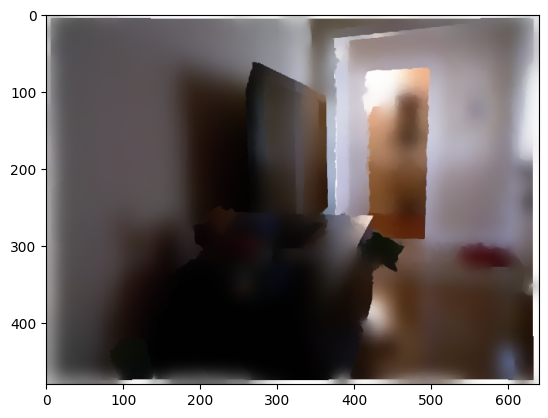

In [24]:
# a_c_new = np.fromfile(f"./data/realsense_tests/{test}-lim-99-500.bin", dtype=np.float32)
print(a_c_new.mean())
a_c_new = a_c_new.reshape((480,640,3))
plt.imshow(a_c_new[:,:,::-1])

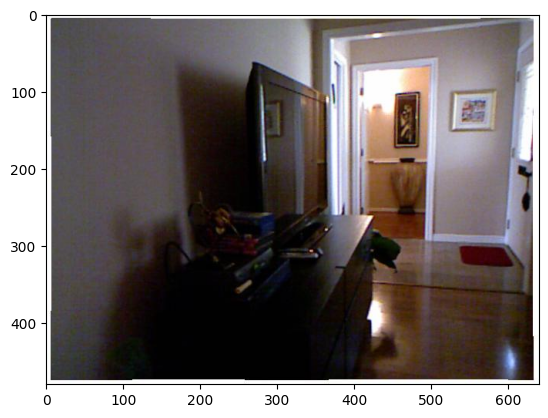

In [22]:
a_c_new = color.reshape((480,640,3))
plt.imshow(a_c_new[:,:,::-1])